In [42]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.options.display.max_rows = 16

In [4]:
"""The data set consisting of global population health and wealth statistics, from the amazing Gapminder website. 
Gapminder is a Swedish foundation created by the late Hans Rosling to promote a fact-based worldview and to fight misconceptions about global development.
"""
#read csv file, 
gapminder = pd.read_csv("gapminder.csv")

In [5]:
gapminder.head(10)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0
5,Afghanistan,1850,Asia,3810047.0,27.70,52.433,7.0,669.0
6,Afghanistan,1860,Asia,3973968.0,27.60,52.290,7.0,692.0
7,Afghanistan,1870,Asia,4169690.0,27.49,52.147,7.0,716.0
8,Afghanistan,1880,Asia,4419695.0,27.39,52.004,7.0,741.0
9,Afghanistan,1890,Asia,4710171.0,27.29,51.861,7.0,767.0


In [6]:
gapminder.describe()

,year,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
count,14740.000000,1.474000e+04,14740.000000,14740.000000,14740.000000,14740.000000
mean,1961.687924,2.252933e+07,56.834526,84.452665,4.643472,9000.506513
std,50.480650,9.307143e+07,15.868464,14.472179,1.994833,14912.146692
min,1800.000000,2.128000e+03,4.000000,33.217000,1.130000,142.000000
25%,1955.000000,8.990308e+05,44.230000,75.182250,2.630000,1391.000000
50%,1975.000000,4.063978e+06,60.080000,89.693000,5.060000,3509.000000
75%,1995.000000,1.218722e+07,70.380000,96.870000,6.440000,10244.000000
max,2015.000000,1.376049e+09,83.300000,99.810000,9.220000,182668.000000


In [7]:
#add column log_gdp_per_day
gapminder["log_gdp_per_day"] = np.log10(gapminder["gdp_per_capita"] /365.25)

In [8]:
gapminder.head(10)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,0.217727
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,0.218447
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,0.218447
3,Afghanistan,1830,Asia,3448982.0,27.90,52.719,7.0,625.0,0.233290
4,Afghanistan,1840,Asia,3625022.0,27.80,52.576,7.0,647.0,0.248314
5,Afghanistan,1850,Asia,3810047.0,27.70,52.433,7.0,669.0,0.262836
6,Afghanistan,1860,Asia,3973968.0,27.60,52.290,7.0,692.0,0.277516
7,Afghanistan,1870,Asia,4169690.0,27.49,52.147,7.0,716.0,0.292323
8,Afghanistan,1880,Asia,4419695.0,27.39,52.004,7.0,741.0,0.307228
9,Afghanistan,1890,Asia,4710171.0,27.29,51.861,7.0,767.0,0.322205


In [25]:
#set year as index
gapminder_by_year = gapminder.set_index("year").sort_index()
gapminder_by_year.head()

,country,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,log_gdp_per_day
year,,,,,,,,
1800,Afghanistan,Asia,3280000.0,28.21,53.142,7.00,603.0,0.217727
1800,Guyana,America,166034.0,31.12,57.084,5.01,1214.0,0.521628
1800,Guinea-Bissau,Africa,218167.0,32.00,58.256,7.25,777.0,0.327831
1800,Guinea,Africa,983959.0,29.50,54.940,6.11,450.0,0.090622
1800,Guatemala,America,458965.0,25.80,49.664,6.45,857.0,0.370391


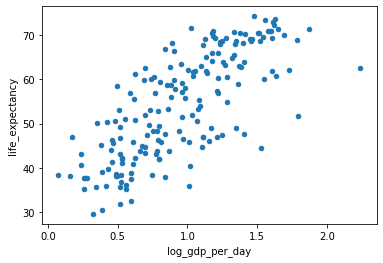

In [11]:
#plot log_gdp_per_day vs life_excpectancy for 1960
gapminder_by_year.loc[1960].plot.scatter("log_gdp_per_day", "life_expectancy")

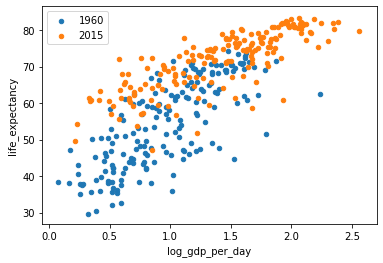

In [12]:
#plot (scatter) log_gdp_per_day vs life_excpectancy for 1960 and 2015

axes = gapminder_by_year.loc[1960].plot.scatter("log_gdp_per_day","life_expectancy", label=1960)
gapminder_by_year.loc[2015].plot.scatter("log_gdp_per_day", "life_expectancy", label=2015, color="C1", ax=axes)

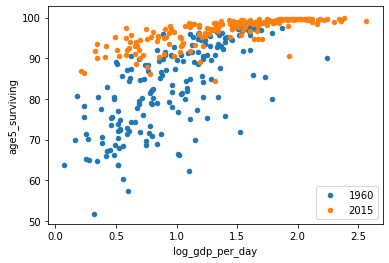

In [13]:
#plot (scatter) log_gdp_per_day vs age5_surviving for 1960 and 2015

axes = gapminder_by_year.loc[1960].plot.scatter("log_gdp_per_day","age5_surviving", label=1960)
gapminder_by_year.loc[2015].plot.scatter("log_gdp_per_day", "age5_surviving", label=2015, color="C1", ax=axes)

In [26]:
#set country as index
gapminder_by_country = gapminder.set_index("country").sort_index()

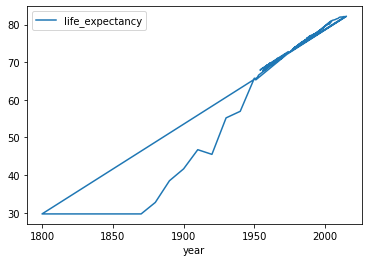

In [27]:
#plot year vs life_expectancy
gapminder_by_country.loc["Italy"].plot("year", "life_expectancy")

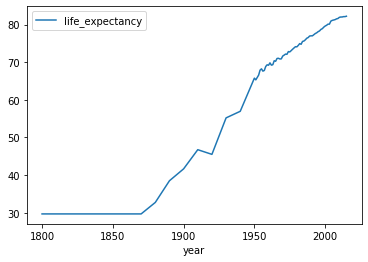

In [16]:
#plot year vs life_expectancy . sorting values first
gapminder_by_country.loc["Italy"].sort_values("year").plot("year", "life_expectancy")

Text(0, 0.5, 'Life expectancy')

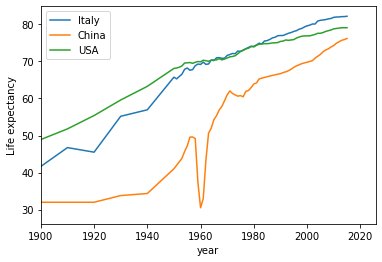

In [29]:
#plotting, italy, china, usa, year vs life_expectancy
axes = gapminder_by_country.loc["Italy"].sort_values("year").plot("year", "life_expectancy", label="Italy")
gapminder_by_country.loc["China"].sort_values("year").plot("year", "life_expectancy", label="China", ax=axes)
gapminder_by_country.loc["United States"].sort_values("year").plot("year", "life_expectancy", label="USA", ax=axes)

plt.axis(xmin= 1900)
plt.ylabel("Life expectancy")

In [34]:
#groupby year, calculate avg babies_per_woman
gapminder.groupby("year").babies_per_woman.mean()

year
1800    6.105028
1810    6.094254
1820    6.094396
1830    6.085879
1840    6.072802
          ...   
2011    2.925110
2012    2.892912
2013    2.863407
2014    2.830934
2015    2.799231
Name: babies_per_woman, Length: 81, dtype: float64

In [36]:
#groupby year, calculate avg. babies per woman
gapminder.groupby("year").age5_surviving.mean()

year
1800    57.477635
1810    57.889608
1820    58.292978
1830    58.546940
1840    58.906379
          ...    
2011    96.213022
2012    96.359231
2013    96.494121
2014    96.617692
2015    96.730110
Name: age5_surviving, Length: 81, dtype: float64

(1955, 2025.75, 55.51501163256634, 98.69273361665962)

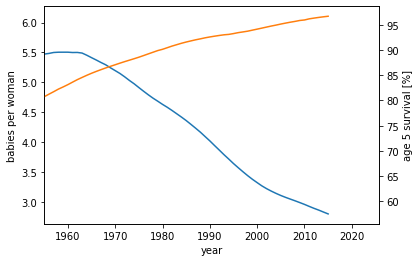

In [32]:
#plot avg babies_per_woman vs year. 
#plot avg age5_surviving in same plot
gapminder.groupby("year").babies_per_woman.mean().plot()
#set ylabel
plt.ylabel("babies per woman")

gapminder.groupby("year").age5_surviving.mean().plot(secondary_y=True)
#set ylabel
plt.ylabel("age 5 survival [%]")

#set x axis, start at 1955
plt.axis(xmin= 1955)

In [21]:
#create pivot_table data=babies_per_woman,  index=year, columns= region
gapminder.pivot_table("babies_per_woman", "year", "region")

region,Africa,America,Asia,Europe
year,,,,
1800,6.393208,6.055758,6.291923,5.561628
1810,6.394151,6.040000,6.281154,5.540233
1820,6.394340,6.031515,6.292692,5.545909
1830,6.395472,6.046364,6.285577,5.506591
1840,6.396226,6.046970,6.255577,5.486591
...,...,...,...,...
2011,4.569811,2.340000,2.736923,1.605227
2012,4.508868,2.315152,2.700769,1.606818
2013,4.447547,2.294242,2.664038,1.617727


(1789.25, 2010, 53.30368601398604, 101.54982447552445)

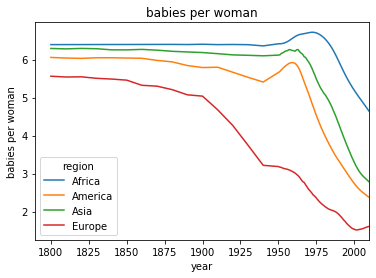

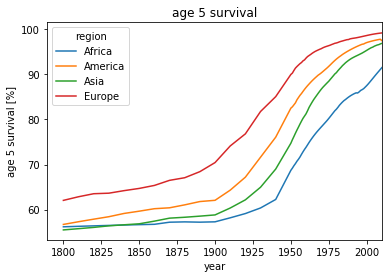

In [49]:
#plot pivot_table abies_per_woman", "year", "region"
gapminder.pivot_table("babies_per_woman", "year", "region").plot()
plt.ylabel("babies per woman")
#set title
plt.title("babies per woman")
#set max value of x and y axis
plt.axis(xmax= 2010)



#plot pivot_table  age5_surviving", "year", "region"
gapminder.pivot_table("age5_surviving", "year", "region").plot()
plt.ylabel("age 5 survival [%]")
plt.title("age 5 survival")
#set max value of x and y axis
plt.axis(xmax= 2010)